<a href="https://colab.research.google.com/github/Dabin-Park/EDA/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# EDA 타이타닉

import pandas as pd
import numpy as np

import seaborn as sns   # 데이터 분포 시각화
import matplotlib.pyplot as plt

In [3]:
'''
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 (특정 카테고리에 속할지를 0과 1 사이의 연속적인 확률로 예측하는 회귀 알고리즘)
from sklearn.svm import SVC, Linear SVC # 분류에 사용되는 지도학습 모델 
                                        # support vector를 사용해서 결정 경계(Decision Boundary)를 정의
                                        # 분류되지 않은 점을 해당 결정 경계와 비교해서 분류 
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류 ()
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃을 활용한 분류
from sklearn.naive_bayes import GaussianNB  # naive_bayes : 통계수학에 기반한 머신러닝 알고리즘
                                            # 이진 속성을 가지고 속성이 많은 경우 : BernoulliNB
                                            # 이진 속성이 아닌 일반적인 연속값 속성을 가지는 경우 : GaussianNB 
 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier  # 확률적 경사하강법 (Stochastic Gradient Descent)
from sklearn.tree import DecisionTreeClassifier # 결정트리 : 
'''
import warnings 
warnings.filterwarnings(action = 'ignore')  # 경고 메시지 무시 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 셋 불러오기
path = '/content/drive/MyDrive/Dataset/'
train_df = pd.read_csv(path+'train.csv')
test_df = pd.read_csv(path+'test.csv') 

# 데이터 분석

In [6]:
 # 데이터 변수 확인
print(train_df.columns.values)  
    # 'Survived' : 생존 여부(종속 변수) (0 = 사망 , 1 = 생존)
    # 'Pclass' : 객실 등급(승객의 사회적, 경제적 지위) (1st : Upper, 2nd : Middle, 3rd : Lower)
    # 'Sex' : 성별 
    # 'Age' : 나이
    # 'SibSp' : 동반한 Sibling(형재 자매)와 Spouse(배우자)의수 
    # 'Parch' : 동반한 Parent(부모) Child(자식)의 수
    # 'Cabin' : 객실의 번호 
    # 'Embarked' : 승선한 항


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()   # 'Survived' 행이 존재 X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# 훈련 자료 정보 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# 테스트 자료 정보 
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* train set과 test set모두 Cabin colunm에 결측지가 많아 삭제를 시킴 

In [11]:
train_df = train_df.drop(columns = 'Cabin')
test_df = test_df.drop(columns = 'Cabin')
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [12]:
# 훈련 자료 int, float 변수 통계치
train_df.describe() # 누락데이터(NaN)는 제외되고 데이터 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 훈련 자료 object 변수 통계치 
train_df.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


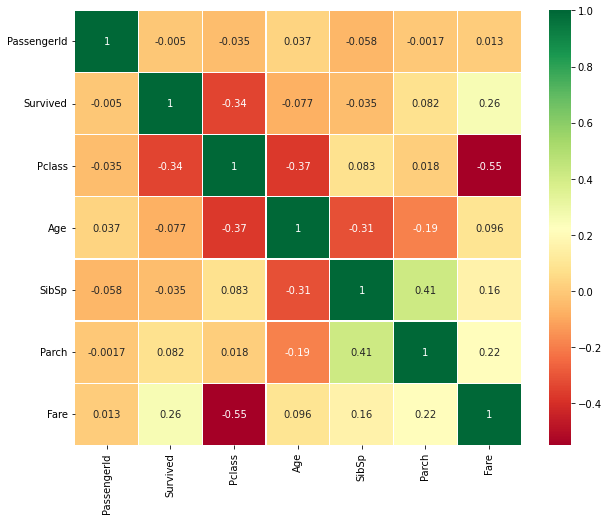

In [14]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

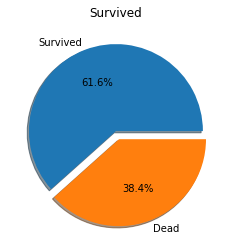

In [15]:
labels = ['Survived', 'Dead']
train_df['Survived'].value_counts().plot.pie(labels = labels, explode = [0,0.1], autopct = '%1.1f%%', shadow = True)
plt.title('Survived')
plt.ylabel('')
plt.show()

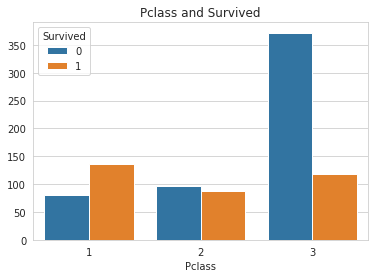

In [16]:
# relation of Pclass and Survived   # 객실 등급이 높을수록 생존 비율이 높다. 
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Pclass and Survived')
plt.ylabel('')
plt.show()

In [17]:
# relation of name and Survived

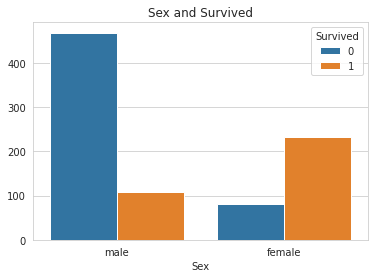

In [18]:
# relation of Sex and Survived  # 남성보다 여성의 생존 비율이 높다.
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Sex and Survived')
plt.ylabel('')
plt.show()

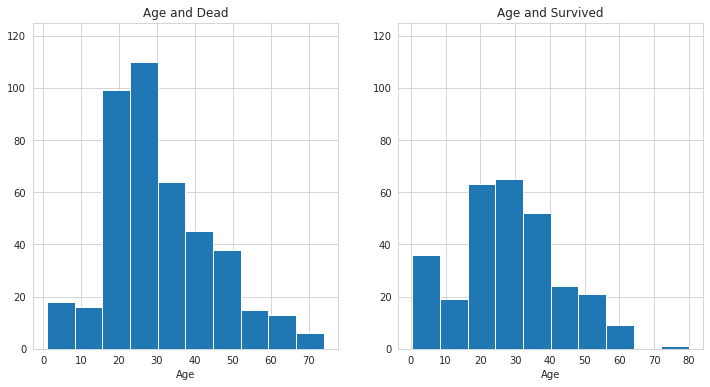

In [19]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Age and Survived  # 아기들의 생존 비율이 높다.
figure.add_subplot(rows, cols, 1)
train_df[train_df['Survived']==0].Age.plot.hist(bins=10)
plt.title('Age and Dead')
plt.xlabel('Age')
plt.ylabel('')
plt.ylim([0, 125])

figure.add_subplot(rows, cols, 2)
train_df[train_df['Survived']==1].Age.plot.hist(bins=10)
plt.title('Age and Survived')
plt.xlabel('Age')
plt.ylabel('')
plt.ylim([0, 125])

plt.show()

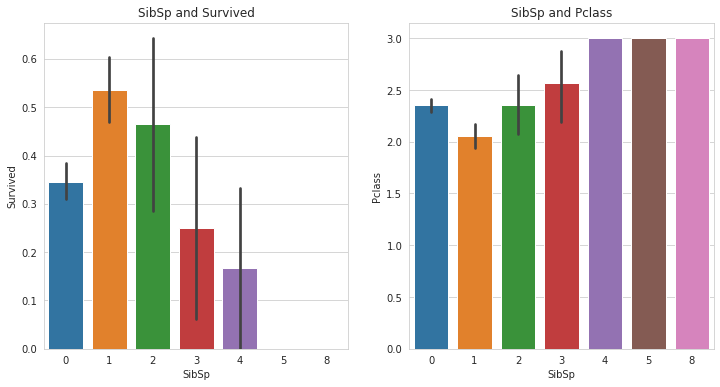

In [20]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of SibSp and Survived    # 의외로 혼자 탄손님의 생존 비율이 낮고, 5명 이상 함께 탄 손님들은 모두 사망 하였다(여러명이 함께 타면 한명쯤은 생존할거 같은데...)
figure.add_subplot(rows, cols, 1)
sns.barplot('SibSp','Survived',data=train_df) 
plt.title('SibSp and Survived')
plt.ylabel('Survived')

# relation of SibSp and Pclass  # 이유 : 5명 이상 함께 탄 손님은 전부 3등급 객실 이용 
figure.add_subplot(rows, cols, 2)
sns.barplot('SibSp','Pclass',data=train_df)  
plt.title('SibSp and Pclass')
plt.ylabel('Pclass')

plt.show()

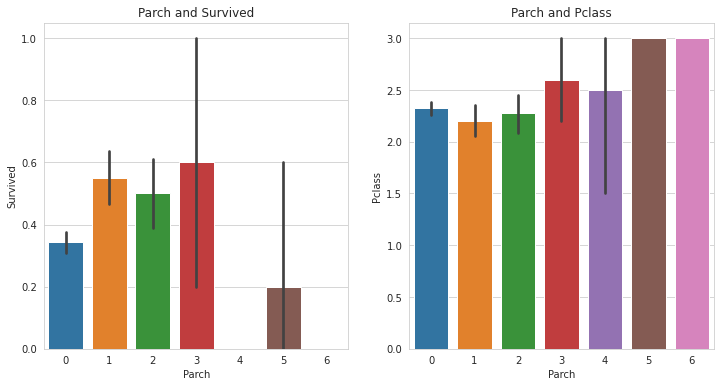

In [21]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Parch and Survived    # SibSp와 결과가 비슷 
figure.add_subplot(rows, cols, 1)
sns.barplot('Parch','Survived',data=train_df) 
plt.title('Parch and Survived')
plt.ylabel('Survived')

# relation of Parch and Pclass
figure.add_subplot(rows, cols, 2)
sns.barplot('Parch','Pclass',data=train_df)  
plt.title('Parch and Pclass')
plt.ylabel('Pclass')

plt.show()

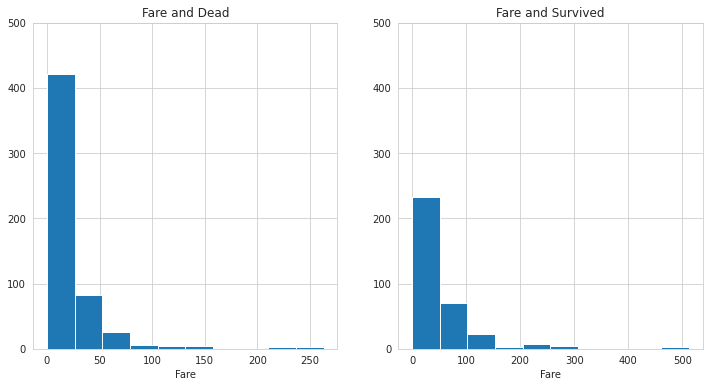

In [22]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Fare and Survived # 가격 저렴한 3등급 객실 손님이 많아 눈으로 비율을 비교하기 힘들다 해결방법은 모르겠다.
figure.add_subplot(rows, cols, 1)
train_df[train_df['Survived']==0].Fare.plot.hist(bins=10)
plt.title('Fare and Dead')
plt.xlabel('Fare')
plt.ylabel('')
plt.ylim([0, 500])

figure.add_subplot(rows, cols, 2)
train_df[train_df['Survived']==1].Fare.plot.hist(bins=10)
plt.title('Fare and Survived')
plt.xlabel('Fare')
plt.ylabel('')
plt.ylim([0, 500])

plt.show()

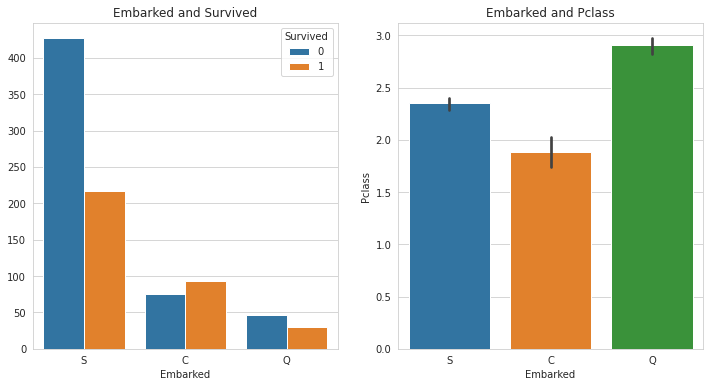

In [23]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Embarked and Survived # C 항구에서 승선한 손님들의 생존 확률이 높다  
figure.add_subplot(rows, cols, 1)
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Embarked and Survived')
plt.ylabel('')

# relation of Embarked and Pclass   # C 항구의 객실 등급 평균이 낮다(좋은 객실에 탔다).
figure.add_subplot(rows, cols, 2)
sns.barplot('Embarked','Pclass',data=train_df)  
plt.title('Embarked and Pclass')
plt.ylabel('Pclass')

plt.show()

# 데이터 전처리 

* 전처리 하기전 결측지 부터 확인 

In [24]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

* 우선 age colunm에 결측치부터 채우자
> * 사람의 이름을 기준으로 Age를 나눈다.

In [25]:
train_df['Initial'] = train_df.Name.str.extract('([A-Za-z]+)\.')    
test_df['Initial'] = test_df.Name.str.extract('([A-Za-z]+)\.')
# A-Z 또는 a-z 사이에 있고 .(점)이 오는 문자열을 찾는다.
# 중간에 위치한 title 찾는 코드 

In [26]:
train_df["Initial"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [27]:
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* 여성은 Miss와 Mrs를 제일 많이 쓰고, 남성은 Mr와 Master를 많이 사용한다.
> * 누락된 데이터 중에서 Miss와 Mrs, Mr와 Master를 title로 갖는 값에 어떤 값을 채워야 될까?
> * 채워야 하는 값을 생각하기에 앞서, Miss, Mrs, Mr, Master와 같은 유의미하게 많은 데이터가 아닌 것들을 유의미한 데이터에 병합 시킨다.
> * 여기서 Mlle과 mme은 Miss의 오타로 추정되기 때문에 Miss로 들어간다.  

In [28]:
# title을 유의미한 데이터로 대체
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [29]:
# 확인
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [30]:
# Initial에 따라 나이 결측치를 평균값으로 넣으려고 한다. 
train_df.groupby("Initial")["Age"].mean()   # groupby : 그룹별로 데이터를 집계하는 매서드

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [31]:
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == 'Master'),"Age"] = 5     # loc(a,b) : a를 만족하는 b에서의 값
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == 'Miss'),"Age"] = 22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == 'Mr'),"Age"] = 33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == 'Mrs'),"Age"] = 36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial == 'Other'),"Age"] = 46

test_df.loc[(test_df.Age.isnull())&(test_df.Initial == 'Master'),"Age"] = 5     # loc(a,b) : a를 만족하는 b에서의 값
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == 'Miss'),"Age"] = 22
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == 'Mr'),"Age"] = 33
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == 'Mrs'),"Age"] = 36
test_df.loc[(test_df.Age.isnull())&(test_df.Initial == 'Other'),"Age"] = 46

* Null 값이 없는지 확인 

In [32]:
train_df.Age.isnull().sum()

0

In [33]:
test_df.Age.isnull().sum()

0

* 이제 Embarked colunm을 채워 주자

In [34]:
train_df.Embarked.isnull().sum()

2

In [35]:
test_df.Embarked.isnull().sum()

0

* 결측치가 2개만 있으므로 가장 많은 S로 채워 주겠다.

In [36]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
train_df["Embarked"].fillna("S",inplace = True)
train_df.Embarked.isnull().sum()

0

* 성별을 숫자로 변환

In [38]:
train_test_data = [train_df, test_df]

sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

* 탑승지를 숫자로 변환

In [39]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

* test set 결측치 추가

In [40]:
for dataset in train_test_data:
    dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# 모델 학습

* PassengerId는 승객들 연번에 불과 하므로 학습시키지 않는다.
* Initial, Ticket, Name도 학습시키지 않는다.

In [41]:
train_df.drop(columns = 'PassengerId', inplace = True)
train_df.drop(columns = 'Initial', inplace = True)
train_df.drop(columns = 'Ticket', inplace = True)
train_df.drop(columns = 'Name', inplace = True)

testPass = test_df['PassengerId']
test_df.drop(columns = 'PassengerId', inplace = True)
test_df.drop(columns = 'Initial', inplace = True)
test_df.drop(columns = 'Ticket', inplace = True)
test_df.drop(columns = 'Name', inplace = True)

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


* 우선 train set에서 label 분리 


In [43]:
train = train_df.drop(columns = 'Survived')
y = train_df['Survived']

* 스케일 조정

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test_df)

## SGDClassifier

In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(train_scaled,y)

SGDClassifier(random_state=42)

* 성능 측정

In [46]:
sgd_clf.score(train_scaled, y)

0.8013468013468014

## LinearSVC

In [47]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(random_state = 42)
lin_svc.fit(train_scaled,y)

LinearSVC(random_state=42)

* 성능 측정

In [48]:
lin_svc.score(train_scaled, y)

0.8002244668911336

In [59]:
from sklearn.metrics import roc_auc_score

pred = lin_svc.predict(train_scaled)
roc_score = roc_auc_score(y, pred)
print(roc_score)

0.7789042277825711


## SVC

In [50]:
from sklearn.svm import SVC

svc = SVC(random_state = 42)
svc.fit(train_scaled,y)

SVC(random_state=42)

* 성능 측정

In [51]:
svc.score(train_scaled, y)

0.8473625140291807

In [60]:
from sklearn.metrics import roc_auc_score

pred = svc.predict(train_scaled)
roc_score = roc_auc_score(y, pred)
print(roc_score)

0.8149506279359602


* SVC가 가장 높다.
> * SVC의 가장 좋은 parameter을 찾아보자

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = { "gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svc, param_distributions, n_iter=100, verbose=2, cv=3)
rnd_search_cv.fit(train_scaled, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .....C=7.169415923918608, gamma=0.01963745615907579; total time=   0.0s
[CV] END .....C=7.169415923918608, gamma=0.01963745615907579; total time=   0.0s
[CV] END .....C=7.169415923918608, gamma=0.01963745615907579; total time=   0.0s
[CV] END ....C=5.735739851377025, gamma=0.004751754126621946; total time=   0.0s
[CV] END ....C=5.735739851377025, gamma=0.004751754126621946; total time=   0.0s
[CV] END ....C=5.735739851377025, gamma=0.004751754126621946; total time=   0.0s
[CV] END ....C=9.004575285654562, gamma=0.001997053123078677; total time=   0.0s
[CV] END ....C=9.004575285654562, gamma=0.001997053123078677; total time=   0.0s
[CV] END ....C=9.004575285654562, gamma=0.001997053123078677; total time=   0.0s
[CV] END .....C=1.1294611901493226, gamma=0.0775971832280443; total time=   0.0s
[CV] END .....C=1.1294611901493226, gamma=0.0775971832280443; total time=   0.0s
[CV] END .....C=1.1294611901493226, gamma=0.07

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a67b7db10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a67b7d890>},
                   verbose=2)

In [53]:
rnd_search_cv.best_estimator_

SVC(C=7.370632709383566, gamma=0.031632713668719475, random_state=42)

In [54]:
rnd_search_cv.best_estimator_.fit(train_scaled, y)

SVC(C=7.370632709383566, gamma=0.031632713668719475, random_state=42)

In [55]:
rnd_search_cv.best_estimator_.score(train_scaled, y)

0.8439955106621774

In [61]:
from sklearn.metrics import roc_auc_score

pred = rnd_search_cv.best_estimator_.predict(train_scaled)
roc_score = roc_auc_score(y, pred)
print(roc_score)

0.8210382513661203


* svc가 가장 높다!

## test set 모델 예측

In [56]:
y_pred = rnd_search_cv.best_estimator_.predict(test_scaled)

* csv파일 저장

In [57]:
submission = pd.DataFrame({
    'PassengerId' : testPass,
    'Survived' : y_pred})

submission.to_csv('submission.csv', index=False)

In [58]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
